In [37]:
import pandas as pd 
df = pd.read_csv('file.csv')

In [38]:
df.head(1)

,Name,Age,Income
0,Rob,27,70000


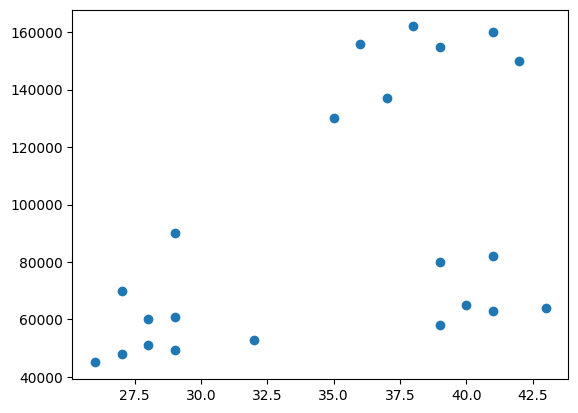

In [39]:
import matplotlib.pyplot as plt 
plt.scatter(df['Age'],df['Income'])

In [40]:
from sklearn.cluster import KMeans 
model = KMeans()

In [41]:
model

KMeans()

In [42]:
y_pred = model.fit_predict(df[['Age','Income']])

In [43]:
y_pred

array([4, 6, 4, 4, 1, 1, 5, 5, 5, 3, 3, 7, 7, 2, 7, 2, 4, 4, 4, 0, 0, 2])

In [44]:
df['cluster']=y_pred 
df

,Name,Age,Income,cluster
0,Rob,27,70000,4
1,Michael,29,90000,6
2,Mohan,29,61000,4
3,Ismail,28,60000,4
4,Kory,42,150000,1
5,Gautam,39,155000,1
6,David,41,160000,5
7,Andrea,38,162000,5
8,Brad,36,156000,5
9,Angelina,35,130000,3


In [45]:
model.cluster_centers_

array([[4.00000000e+01, 8.10000000e+04],
       [4.05000000e+01, 1.52500000e+05],
       [3.30000000e+01, 5.40000000e+04],
       [3.60000000e+01, 1.33500000e+05],
       [3.46666667e+01, 6.38333333e+04],
       [3.83333333e+01, 1.59333333e+05],
       [2.90000000e+01, 9.00000000e+04],
       [2.73333333e+01, 4.75000000e+04]])

In [46]:
df0 = df[df.cluster==0]
df1 = df[df.cluster==1]
df2 = df[df.cluster==2]
df3 = df[df.cluster==3]
df4 = df[df.cluster==4]
df5 = df[df.cluster==5]
df6 = df[df.cluster==6]
df7 = df[df.cluster==7]

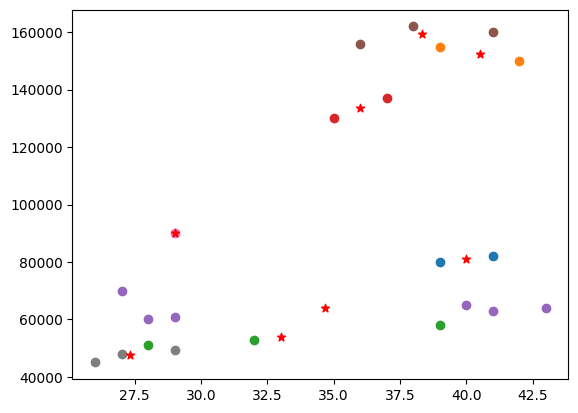

In [48]:
plt.scatter(df0.Age, df0.Income)
plt.scatter(df1.Age, df1.Income)
plt.scatter(df2.Age, df2.Income)
plt.scatter(df3.Age, df3.Income)
plt.scatter(df4.Age, df4.Income)
plt.scatter(df5.Age, df5.Income)
plt.scatter(df6.Age, df6.Income)
plt.scatter(df7.Age, df7.Income)
plt.scatter(model.cluster_centers_[:,0],model.cluster_centers_[:,1],marker='*',color='r')

In [55]:
#sse 
sse = []
sse_r = range(1,10)
for i in sse_r: 
    km = KMeans(n_clusters = i)
    km.fit_predict(df[['Age','Income']])
    sse.append(km.inertia_)
sse

[39748148458.545456,
 3318233941.161905,
 1577046058.883117,
 1058800432.7238096,
 296500418.0952381,
 238167028.08333334,
 188050327.62857145,
 130883580.86666667,
 133300321.62857144]

Text(0, 0.5, 'SSE')

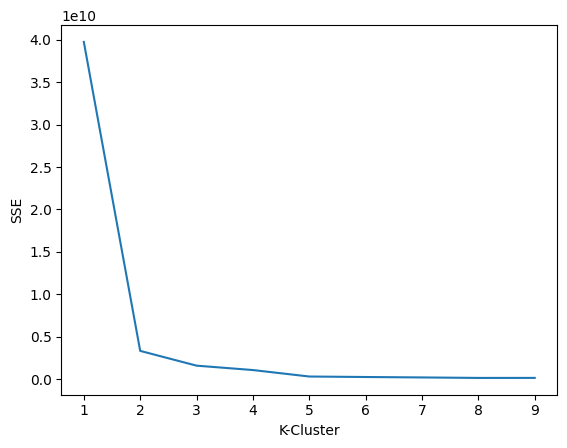

In [56]:
plt.plot(sse_r, sse)
plt.xlabel('K-Cluster')
plt.ylabel('SSE')

In [57]:
#KNN Classification

In [63]:
from sklearn.datasets import load_iris 

In [64]:
iris = load_iris()

In [65]:
import pandas as pd 
df = pd.DataFrame(iris.data,columns = iris.feature_names)

In [66]:
df['target'] = iris.target

In [67]:
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [68]:
df0 = df[:50]
df1 = df[50:100]
df2 = df[100:150]

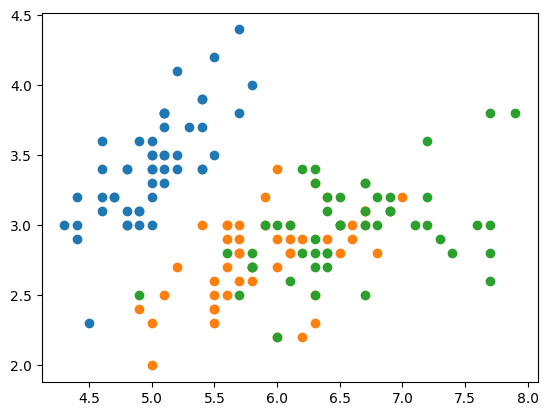

In [72]:
import matplotlib.pyplot as plt 
plt.scatter(df0['sepal length (cm)'],df0['sepal width (cm)'])
plt.scatter(df1['sepal length (cm)'],df1['sepal width (cm)'])
plt.scatter(df2['sepal length (cm)'],df2['sepal width (cm)'])

In [73]:
from sklearn.model_selection import train_test_split 
x = df.drop(['target'],axis= 'columns')
y = df.target

In [74]:
x_train, x_test, y_train, y_test = train_test_split(x,y)

In [76]:
from sklearn.neighbors import KNeighborsClassifier

In [77]:
model = KNeighborsClassifier()

In [78]:
model.fit(x_train,y_train)

KNeighborsClassifier()

In [80]:
model.predict([[5,5,5,5]])

C:\Users\HP\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


array([2])

In [81]:
model.score(x_test,y_test)

0.9736842105263158

In [82]:
from sklearn.metrics import confusion_matrix 
y_pred = model.predict(x_test)
cm = confusion_matrix(y_test,y_pred)

In [83]:
import seaborn as sns 

Text(50.722222222222214, 0.5, 'pred')

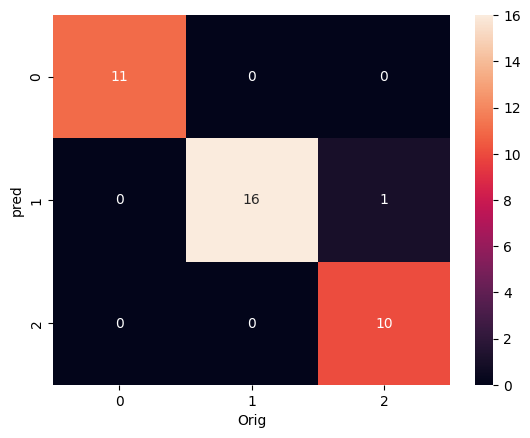

In [85]:
sns.heatmap(cm, annot=True)
plt.xlabel('Orig')
plt.ylabel('pred')

In [87]:
from sklearn.metrics import classification_report 
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       1.00      0.94      0.97        17
           2       0.91      1.00      0.95        10

    accuracy                           0.97        38
   macro avg       0.97      0.98      0.97        38
weighted avg       0.98      0.97      0.97        38



In [97]:
#tp,fn,fp,tn = cm(y_test,y_pred, labels=[1,0]).reshape(-1)
#print(tp,fn,fp,tn)